In [1]:
cd('../src/');

In [2]:
fhandle = fopen('../Data/Vorgabe.txt','r');

In [3]:
formatSpec = '%f %f %f %d';
sizeA = [4 Inf];

In [4]:
A = fscanf(fhandle,formatSpec,sizeA);

In [5]:
fclose(fhandle);

In [6]:
size(A)


ans =

           4     1252931




In [7]:
'../Data/Vorgabe.png'


ans =

../Data/Vorgabe.png




In [8]:
clear B;
B(1, :) = A(1, :) - A(1, 1);
B(2, :) = A(2, :) - A(2, 1);

B(1, :) =  B(1, :) + abs(min(B(1, :))) + 1;
B(2, :) =  B(2, :) + abs(min(B(2, :))) + 1;

size(B)


ans =

           2     1252931




In [9]:
minX  = min(B(1, :))
maxX  = max(B(1, :))
diffX = maxX - minX

minY  = min(B(2, :))
maxY  = max(B(2, :))
diffY = maxY - minY


minX =

     1


maxX =

   30.8803


diffX =

   29.8803


minY =

     1


maxY =

   26.7464


diffY =

   25.7464




> In images.internal.initSize (line 71)
  In imshow (line 327)

ans =

        2675        3089




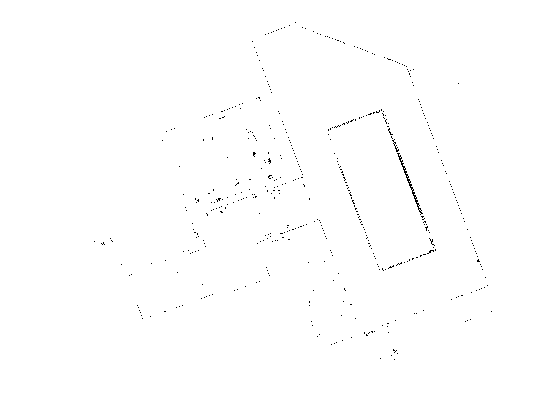

In [10]:
map = logical(zeros(ceil(diffY * 100), ceil(diffX * 100)));

for i = 1 : length(A)
    x = ceil(B(1, i) * 100);
    y = ceil(B(2, i) * 100);
    map(y, x) = 1;
end


mapFlip = flip(map, 1);
imgMap = imcomplement(mapFlip);
imshow(imgMap);
imwrite(imgMap, '../Data/Vorgabe.png')

size(imgMap)

In [ ]:
sizeX = floor(diffX * 100)
sizeY = floor(diffY * 100)
figure('name', 'display scatter', 'pos', [0, 0, sizeX, sizeY]);

% Plot
scatter(A(1, :), A(2, :), 0.01, '.', 'black');

% Labels
xlim([minX, maxX]);
ylim([minY, maxY]);

% Axis stuff
ax = gca;
axis equal;
set(ax, 'Visible', 'off');
outerpos = ax.OuterPosition;
ti = ax.TightInset; 
left = outerpos(1) + ti(1);
bottom = outerpos(2) + ti(2);
ax_width = outerpos(3) - ti(1) - ti(3);
ax_height = outerpos(4) - ti(2) - ti(4);
ax.Position = [left bottom ax_width ax_height];

% figure stuff
fig = gcf;
fig.PaperPositionMode = 'auto';
fig_pos = fig.PaperPosition
fig.PaperPosition = [0 0 sizeX sizeY]
fig.PaperSize = [sizeX sizeY];

% Save
saveas(gcf, '../Data/Vorgabe.png');

## Load image

In [11]:
imgOrg = imread('../Data/Vorgabe.png');

% imgCrop = imcrop(imgOrg, []);
size(imgOrg)


ans =

        2675        3089




In [ ]:
sim = size(imgOrg)
imX = sim(2) - floor(diffX * 100)
imY = sim(1) - floor(diffY * 100)

imgCrop = imcrop(imgOrg, [imX / 2, imY / 2, imX / 2 + diffX, imY / 2 + diffY]);

imshow(imgCrop)

> In images.internal.initSize (line 71)
  In imshow (line 327)



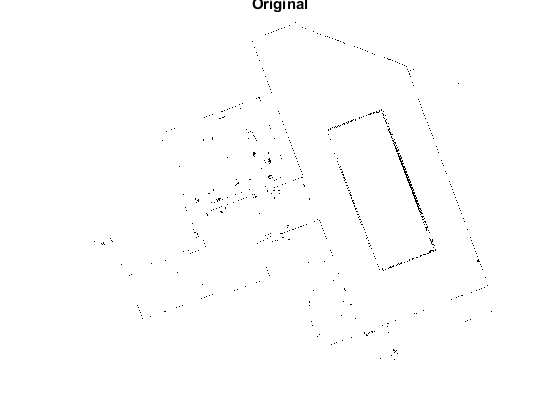

In [12]:
figure('name', 'Original');
imshow(imgOrg);
title('Original');

## Binary image

In [16]:
% imgBin = imbinarize(rgb2gray(imgOrg));
imgBin = imgOrg;
size(imgBin)


imgBin(1, 1)


ans =

        2675        3089


ans =

  logical

   1




> In images.internal.initSize (line 71)
  In imshow (line 327)



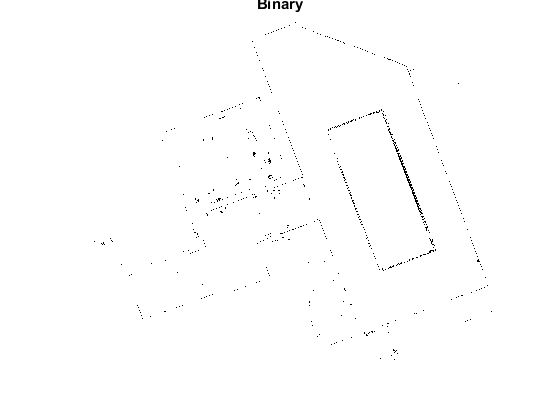

In [17]:
figure('name', 'Binary');
imshow(imgBin);
title('Binary');

## Median filter

In [ ]:
imgMed = medfilt2(rgb2gray(imgOrg));
imgMed = medfilt2(imgMed);

In [ ]:
figure('name', 'Median');
imshow(imgMed);
title('Median');

## Canny filter

In [ ]:
imgCan = edge(imgBin, 'canny');

In [ ]:
figure('name', 'Canny');
imshow(imgCan);
title('Canny');

## Erode median image

In [26]:
strDia = strel('disk', 2);
imgEro = imopen(imgBin, strDia);

> In images.internal.initSize (line 71)
  In imshow (line 327)



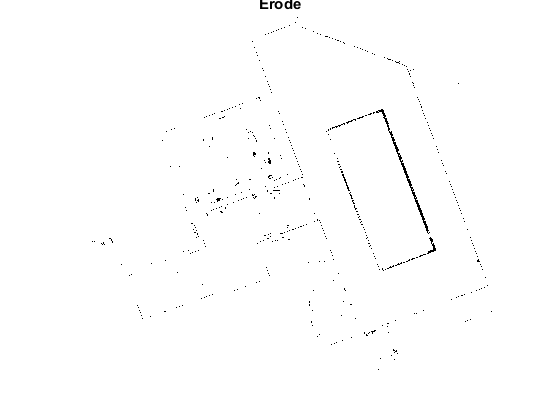

In [27]:
figure('name', 'Erode');
imshow(imgEro);
title('Erode');

In [28]:
m = [
    0, 0, 0;
    0, 1, 0;
    0, 0, 0
];
imgCus = imfilter(imgBin, m);

> In images.internal.initSize (line 71)
  In imshow (line 327)



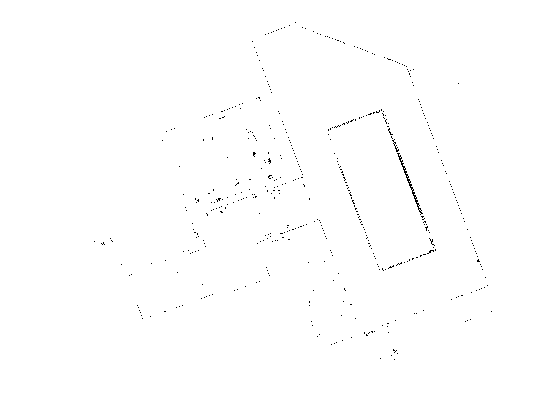

In [29]:
figure();
imshow(imgCus);

In [30]:
[rows, columns] = size(imgBin);
imgNew = ones(rows - 2, columns - 2);

for row = 3 : rows - 2
    for column = 3 : columns - 2
        sumP = sum([
            sum(imgBin(row - 2, (column - 2) : (column + 2))),...
            sum(imgBin(row - 1, (column - 2) : (column + 2))),...
            sum(imgBin(row,     (column - 2) : (column + 2))),...
            sum(imgBin(row + 1, (column - 2) : (column + 2))),...
            sum(imgBin(row + 2, (column - 2) : (column + 2)))
        ]);
        if sumP <= 3
            imgNew(row - 1, column - 1) = 0;
        else
            imgNew(row - 1, column - 1) = 1;
        end
    end
end

> In images.internal.initSize (line 71)
  In imshow (line 327)



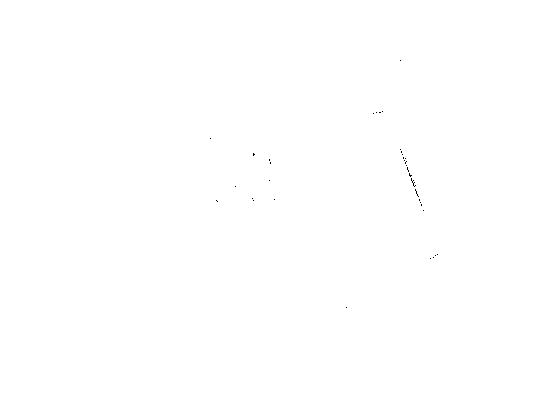

In [31]:
imshow(imgNew);

> In images.internal.initSize (line 71)
  In imshow (line 327)



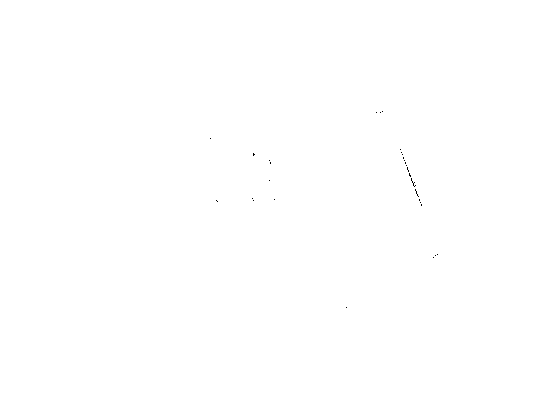

In [32]:
imgCan = edge(imgNew, 'canny');
imshow(medfilt2(imgNew));